# Zillow Zestimate : Home Value Prediction - EDA
                                            
                                                                   Code Written By : Dasari Mohana
                                                                                
## Business Objective:

Buying a house that suits their choices is every person's desire, and it is thus known as their dream house. One considers several aspects while purchasing a home, starting from the budget, the location, the number of rooms available, and many more. But how to find a house that satisfies one's requirements?  This is not a quick and easy task.

But no need to worry; homebuyers can nowadays find their dream home with a click of a button. Zillow is a popular estimator for house evaluation available online. It is considered one of the top real estate marketplaces for buying a house in the United States. Zillow's Zestimate allows the homebuyers to search for a home that satisfies their location, area, budget, etc.

The Zillow Zestimate provides the homebuyers with information on the actual worth of the house based on public data. The accuracy of the Zestimate information depends on the location and availability of the data of a specific area. Hence the more data available, the more is the accuracy of the Zestimate.       


## Aim:

To predict the sale prices of the houses and improve the log error i.e. the error due to the difference between the actual and the predicted home values.

## My Approach

1. Importing the required libraries and reading the dataset.

	a.Merging of the two datasets
	
	b.Understanding the dataset
	
2. Exploratory Data Analysis (EDA) –

	a.Data Visualization
	
3. Feature Engineering

	a.Duplicate value removal
	
	b.Missing value imputation
	
	c.Rescaling of incorrectly scaled data
	
	d.Standardization
	
	e.Encoding of categorical variables
	
	f.Generation of new feature wherever required.
	
	g.Dropping of redundant feature columns
	
	h.Checking for multi-collinearity and removal of highly correlated features
	
	i.Check for the outliners and removal of outliers.
	
4. Model Building

	a.Performing train test split
	
	b.Feature Scaling
	
	c.Dropping features if necessary
	
	d.Linear Regression Model
	
	e.Elastic Net
	
	f.Ridge Regression
	
	g.Lasso Regressor
	
	h.XGBoost Regressor
	
	i.Adaboost Regressor
	
	j.Gradient Boosting Regressor
	
	k.Decision Tree Regressor
	
	l.Random Forest Regressor
	
5. Model Validation

	a.Mean Absolute Error
	
	b.Mean Squared Error
	
	c.Root Mean Squared Error
	
6. Hypermeter Tuning (GridSearchCV)

	a.For Random Forest Regressor
	
7. Checking for Feature Importance

8. Creating the final model and making predictions

9. Conclusion


### Importing Libraries & Loading Dataset:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

In [ ]:
properties_2016 = pd.read_csv('../input/zillow-prize-1/properties_2016.csv')
train_2016 = pd.read_csv('../input/zillow-prize-1/train_2016_v2.csv')

In [ ]:
# Shape of the datasets
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

In [ ]:
properties_2016.head()

In [ ]:
train_2016.head()

### Feature	Description:
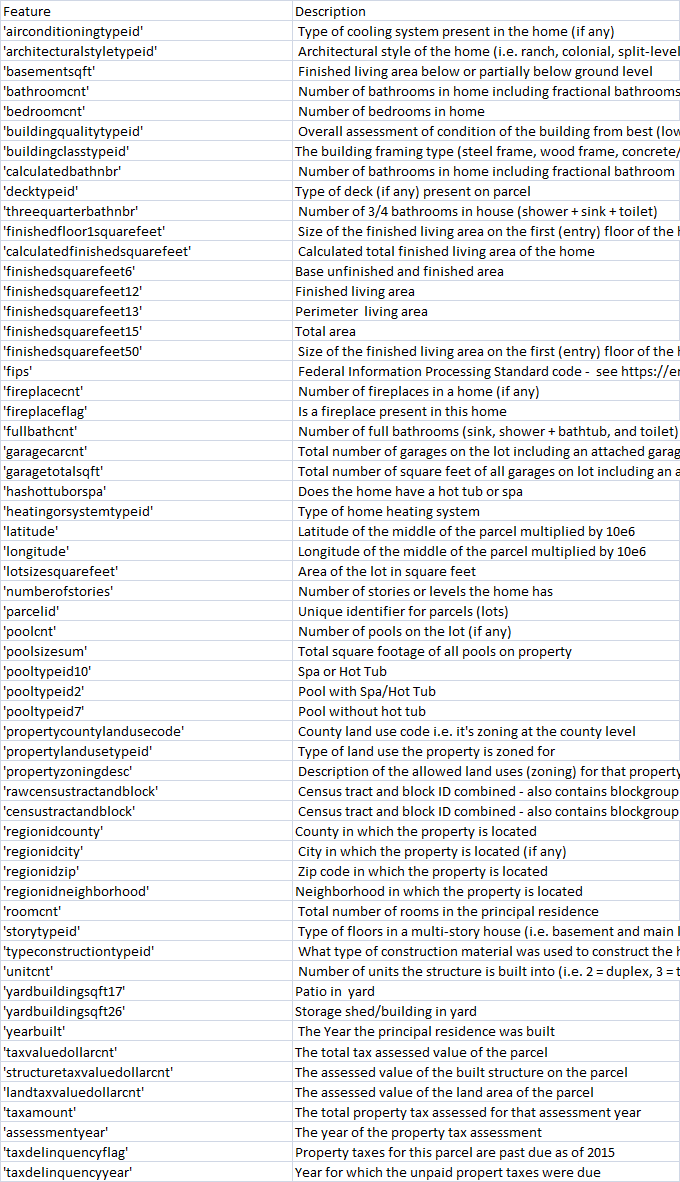

#### Observation:
We can see that parcelid is the unique identifier between the 2 tables. Therefore we will merge the 2 tables based on parcelid to form our complete datatset and then go ahead with other EDA techniques.

In [ ]:
# Reforming Dataset

final_df = properties_2016.copy()
final_df = final_df.merge(train_2016,on = 'parcelid',how = 'inner')
final_df.head()

In [ ]:
final_df.shape

# Exploring Data Analysis

The above reformed dataset contains 90275 rows and 60 columns.

Let's analyse the dataset to identify the following:

1. Missing values
2. Distribution of the numerical variables
3. Outliers
4. Distribution of the categorical variables
5. Potential relationship between the variables and the target

In [ ]:
# Creating a copy of the dataset
zillow_df = final_df.copy()

### Dataset Information:

In [ ]:
zillow_df.columns

In [ ]:
zillow_df.info()

In [ ]:
zillow_df.describe()

### Checking for Missing values

In [ ]:
mis_val = [var for var in zillow_df.columns if zillow_df[var].isnull().sum()>0]

zillow_df[mis_val].isnull().sum()

In [ ]:
# Missing Values Percentage in total data
zillow_df.isnull().mean()*100

### Relationship between missing values and log error (Target Variable)

In [ ]:
def analyze_missing_values(df, var):
    new_df = df.copy()
    
    new_df[var] = np.where(new_df[var].isnull(), 1, 0)  
    # here 1 represents that there is missing value and 0 represents no missing values
    
    new_df.groupby(var)['logerror'].median().plot.bar()
    
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_values(zillow_df, var)
    


In [ ]:
print("Total no of variables with missing value in the dataset: ", len(mis_val))

### Distribution of Numerical variables

In [ ]:
num_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes!= 'O'] # Non-Object Variables
print("Total no.of numerical variables in the dataset: ", len(num_vars))

In [ ]:
zillow_df[num_vars].head()

### Distribution of  Categorical variables

In [ ]:
cat_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes == 'O'] # Object Variables
print("Total no.of categorical variables in the dataset: ", len(cat_vars))

In [ ]:
zillow_df[cat_vars].head()

In [ ]:
for var in cat_vars:
    print(var,'-->', len(zillow_df[var].unique()), "Categories")

In [ ]:
### Analyzing Rarely occuring Labels

def analyze_rare_labels(df, var, rare_percentage):
    new_df = df.copy()
    
    # determine the % of observations per category
    tmp = new_df.groupby(var)['logerror'].count() / len(new_df)
    
    # return categories that are rare
    return tmp[tmp < rare_percentage]

# print categories that are present in less than 1% of the observations
for var in cat_vars:
    print(analyze_rare_labels(zillow_df, var, 0.01))
    print()

#### Temporal variables assosciated with time

In [ ]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var ]
len(year_var), year_var

#### Relationship between Temporal variables and Log error

In [ ]:
new_df = zillow_df.copy()

# Difference between year variable and year the house was sold
new_df[var] = new_df['assessmentyear'] - new_df['yearbuilt']    

plt.scatter(new_df[var],new_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('Logerror')
plt.title('Year Difference vs Logerror')

### Distribution of Discrete variables

In [ ]:
discrete_vars = [var for var in num_vars if len(zillow_df[var].unique()) < 20]

print('No.of discrete variables: ', len(discrete_vars))

In [ ]:
zillow_df[discrete_vars].head()

In [ ]:
def analyze_disc_vars(df,var):
    
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in discrete_vars:
    analyze_disc_vars(zillow_df,var)

### Distribution of Continuous variables

In [ ]:
cont_vars = [var for var in num_vars if var not in discrete_vars and year_var]
print('No of continuous variables : ', len(cont_vars))

In [ ]:
def analyze_cont_vars(df,var):
    
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(zillow_df,var)

#### Observation:

Some of the variables are not normally distributed.

Evaluate if a logarithmic transformation of the variables returns values that will follow normal distribution

In [ ]:
# log Transformation of variables

def analyze_log_variation(df,var):
    
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass                 
    # Hence log(0) = undefined

    else:
        
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(zillow_df,var)

#### Observation:
We see that we get a better spread of the values for only few variables when we use the logarithmic transformation. 

### Analyzing Outliers

In [ ]:
def analyze_outliers(df,var):
    
    new_df = df.copy()
    
    if 0 in new_df[var].unique():
        pass
    
    else:
        new_df[var] = np.log(df[var])
        new_df.boxplot(column=var)
        plt.tight_layout()
        plt.show()
        
for var in cont_vars:
    analyze_outliers(zillow_df,var)
    print('\n')

#### Observation:
We can see that there are outliers in some of the variables and we will remove those outliers with feature engineering and bulid a model on top of it

## Saving the dataset for Feature Engineering

In [ ]:
zillow_df.to_csv('zillow_initial_dataset.csv', index=False)

# Feature Engineering
                                                                 
I will pre-process the variables of the Dataset and do feature engineering therefore we tackle following challenges:

* Duplicate check
* Missing values
* Temporal variables
* Selective transformation of incorrectly scaled values
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('./zillow_initial_dataset.csv')
df_copy = df.copy()
df.shape

In [ ]:
df.head()

## Duplicate Id check and removal

In [ ]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

#### Observation:

We can see that there are 125 rows of duplicate data with respect to the same parcelid. Therefore, we will drop them.

In [ ]:
df.drop_duplicates(subset ="parcelid", keep = 'first', inplace = True)
df.shape

###  Missing Values

In [ ]:
df.isnull().mean()*100

#### Observation:
We can see lot of missing values are there in multiple columns. Therefore, in order to avoid creating synthetic data for columns which have more than 60% missing values, we will drop those columns(>60% null values) and perform feature engineering on the rest of the data.

### Dropping columns having more than 60% Missing values / Null values

In [ ]:
def drop_columns_with_max_missing_values(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    
    print('Columns with more than 60% missing values: \n', var_to_be_dropped)
    print('\n---- Dropping columns with more than 60% missing values ----\n')

    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    
    print('Remaining columns are: \n', df.columns)
    return df

df = drop_columns_with_max_missing_values(df)

In [ ]:
df.shape

In [ ]:
df.head()

### Capture elapsed time

In [ ]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

In [ ]:
df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)
df.head()

## Transform incorrectly scaled variables

1. As mentioned in the data dictionary, the latitude and longitude has been multiplied to 10^6.

2. I will perform a division of the same to scale it to original.

3. I will perform a similar operation for 'rawcensustractandblock'.

4. Also, I will perform a division of 10^12 for the 'censustractandblock' variable to bring it to original scale.

In [ ]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']])/(10**6)

df['censustractandblock'] = (df['censustractandblock'])/(10**12)

df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)

df.head()

### Handling missing values:

To deal with missing values in numerical variables, I will replace the missing values in the original variable with the mode

In [ ]:
df.isnull().sum()

In [ ]:
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df, mis_var)
df.head()

In [ ]:
df.isnull().mean()*100

### Encoding categorical variables (Transforming Categorical Variables to Numerical Variables)

In [ ]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
cat_vars

In [ ]:
def encode_categorical_variables(df, cat_vars):
    
    print('Categorical variables: ', cat_vars)
    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
        
    return df

df = encode_categorical_variables(df, cat_vars)
df.head(10)

### Checking Outliers & Removing them

In [ ]:
df.shape

In [ ]:
# Using Z-score as a threhold (WE can also find outliers using IQR and boxplot)

z = np.abs(stats.zscore(df))
no_out_df = df[(z<3).all(axis=1)]
no_out_df.shape

### Checking for Multi-Colinearity

In [ ]:
correlation = no_out_df.corr()

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation, cmap='BrBG', annot=True)

#### Observation:
We observe high correlation among some of the feature variables from the above correlation plot. Therefore we will drop some of the features and then build our model on top of that.

In [ ]:
no_out_df.drop(columns=['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt', 
                        'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'fullbathcnt'], axis=1, inplace=True)

plt.figure(figsize=(20,12))
sns.heatmap(no_out_df.corr(), cmap='BrBG',annot=True)

### Re-Examining Dataset

In [ ]:
no_out_df.shape

In [ ]:
no_out_df.head()

#### Observation:
1. Due to repetitive data, we will drop 1 of rawcensustractandblock and censustractandblock.
2. The propertycountylandusecode_labels will serve no useful purpose for our model prediction.
3. parcelid will also serve no use for our prediction.
4. Therefore, we will drop those columns and build a model on top of this data

In [ ]:
no_out_df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
no_out_df.shape

In [ ]:
# Saving final Dataset

no_out_df.to_csv('final_zillow_dataset.csv', index=False)

# Buliding a Regression Model 
                                                                                        
We have done EDA and Feature Engineering on raw dataset and got final dataset with neccessary changes(removing duplicates, scaling the data, Multicolinearity, replacing null values, Removing outliers)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('./final_zillow_dataset.csv')
df.shape

In [ ]:
df.head()

### Splitting the dataset into Train-Test sets

In [ ]:
X = df.drop('logerror', axis=1)
y = df['logerror']

new_df = df.copy()

print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Feature Scaling

In [ ]:
train_vars = [var for var in X_train.columns if var not in ['parcelid', 'logerror']]
len(train_vars)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [ ]:
X_train.head()

### Dropping parcelid as it does not serve purpose for model prediction 

In [ ]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='parcelid', axis=1, inplace=True)
X_test.drop(columns='parcelid', axis=1, inplace=True)

## Linear Regression Model

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

In [ ]:
linear_reg_pred = linear_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))

## Elastic Net Model

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # L1 reguralization

elastic_net.fit(X_train, y_train)

In [ ]:
elastic_net_pred = elastic_net.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, elastic_net_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, elastic_net_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, elastic_net_pred))))

## Ridge Regression Model

In [ ]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X_train, y_train)

In [ ]:
ridge_reg_pred = ridge_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, ridge_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, ridge_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, ridge_reg_pred))))

## Lasso Regression Model

In [ ]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

In [ ]:
lasso_reg_pred = lasso_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, lasso_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, lasso_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, lasso_reg_pred))))

## XG Boost Regression Model

In [ ]:
xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)

In [ ]:
xgb_reg_pred = xgb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, xgb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, xgb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, xgb_reg_pred))))

## Ada Boost Regression Model

In [ ]:
adaboost_reg = AdaBoostRegressor()

adaboost_reg.fit(X_train, y_train)

In [ ]:
adaboost_reg_pred = adaboost_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, adaboost_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, adaboost_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, adaboost_reg_pred))))

## Gradient Boosting Regression Model

In [ ]:
gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

In [ ]:
gb_reg_pred = gb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, gb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, gb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, gb_reg_pred))))

## Decision Tree Regressor

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)

In [ ]:
tree_reg_pred = tree_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, tree_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, tree_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, tree_reg_pred))))

## Random Forest Regression Model

In [ ]:
forest_reg = RandomForestRegressor(n_estimators= 500, max_depth=6)

forest_reg.fit(X_train, y_train)

In [ ]:
forest_reg_pred = forest_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, forest_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, forest_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, forest_reg_pred))))

## Cross Validation & Hyperparameter Optimization for Random Forest

In [ ]:
scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)

In [ ]:
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

In [ ]:
param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]}]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_squared_error',return_train_score=True,cv=3)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [ ]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, final_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, final_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, final_pred))))

In [ ]:
# saving the model
import pickle
file_name = 'final_pickle_model.pickle'
pickle.dump(final_predictor,open(file_name,'wb'))

## Feature importance

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

attrs = list(df.select_dtypes(include = ['float64','int64']))

sorted(zip(attrs, feature_importances), reverse=True)

## Saving Predictions

In [ ]:
model_pred = pd.DataFrame({'parcelid':X_test_new.parcelid, 'logerror':final_pred})
model_pred.to_csv('model_predictions.csv',index=False)
model_pred.head()

# Conclusion

1. I have performed all the feature engineering steps necessary to ensure the dataset is ready to be fed into Machine Learning algorithms. 

2. After Pre-processing and Feature Engineering the raw dataset we splitted the dataset into train and test sets.

3. Performed Feature scaling on data for better performance.

4. Trained multiple models using different ML regression algorithms on dataset.

5. Appleied Performance metrics such as MAE, MSE, RMSE to find out best prediction model.

6. With the help of GridSearch CV we found out best estimator with least Root mean squred error. 

7. Saved best predictor in .pickle format for future predictions.

8. Done prediction on test data and saved predictions into .csv file.